<a href="https://colab.research.google.com/github/TNK443/AD/blob/main/AD_Trab03_Alg_Genetico_Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMO GENETICO - MULTIPLO OBJETIVOS**

### Bibliotecas

In [ ]:
# BIBLIOTECAS #
#Inicializa as Lib's necessárias.
import matplotlib.pyplot as plt
import numpy as np

from numpy import linspace
from matplotlib import cm
from IPython.display import clear_output
from time import time

### Base

In [ ]:
BASE = {'ITEM': [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25, 
                   26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50, 
                   51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75, 
                   76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 
                  101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 
                  126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 
                  151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 
                  176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 
                  201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 
                  226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 
                  251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 
                  276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 
                  301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 
                  326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 
                  351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 
                  376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 
                  401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 
                  426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 
                  451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 
                  476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
         'PESO': [0.781, 0.834, 1.168, 3.308, 4.014, 4.308, 4.469, 4.170, 1.869, 0.089, 3.855, 4.449, 3.058, 4.318, 2.366, 2.122, 1.013, 3.411, 3.619, 2.203, 
                  4.710, 4.466, 3.758, 0.909, 1.437, 2.267, 0.014, 4.776, 1.027, 2.277, 1.226, 4.638, 1.291, 4.563, 3.177, 3.526, 2.610, 4.274, 2.101, 4.871, 
                  4.649, 2.819, 4.324, 4.547, 1.084, 4.555, 2.833, 2.048, 2.807, 0.580, 0.492, 0.408, 1.089, 3.965, 1.360, 2.458, 2.105, 4.175, 4.727, 4.952, 
                  2.757, 1.290, 2.108, 0.255, 4.768, 1.765, 1.971, 2.727, 4.849, 3.037, 3.195, 4.017, 2.613, 0.107, 1.059, 0.792, 0.890, 0.193, 2.402, 3.412, 
                  2.233, 4.850, 1.052, 4.734, 2.923, 4.970, 2.804, 2.967, 1.549, 4.451, 1.050, 2.776, 2.316, 0.682, 3.110, 1.001, 3.986, 1.065, 0.384, 0.749, 
                  1.346, 3.279, 2.419, 4.971, 0.779, 2.114, 1.233, 3.228, 0.167, 2.399, 1.277, 4.746, 2.216, 3.609, 3.696, 3.894, 2.032, 0.633, 1.203, 3.082, 
                  1.653, 4.981, 3.456, 0.113, 1.483, 4.453, 2.006, 0.938, 0.457, 2.968, 1.204, 1.606, 2.113, 0.505, 2.463, 3.988, 3.746, 3.469, 4.590, 1.070, 
                  3.165, 0.464, 4.127, 0.097, 1.792, 3.333, 1.734, 2.372, 0.354, 2.431, 4.790, 1.857, 0.500, 1.007, 4.013, 2.392, 1.576, 1.609, 2.883, 2.067, 
                  0.671, 2.344, 2.439, 2.680, 2.374, 2.976, 1.777, 1.975, 4.241, 0.010, 0.438, 3.490, 2.743, 4.275, 4.898, 4.509, 3.139, 1.106, 0.103, 0.028, 
                  2.222, 4.567, 4.190, 2.267, 4.321, 4.934, 1.818, 1.558, 2.121, 4.119, 3.676, 0.328, 0.604, 1.031, 1.499, 0.928, 3.172, 0.410, 2.253, 2.083, 
                  2.777, 0.387, 4.809, 0.819, 4.311, 4.957, 1.090, 3.337, 0.092, 4.744, 3.781, 3.675, 1.325, 2.768, 0.673, 3.405, 1.588, 1.042, 1.456, 3.612, 
                  2.747, 3.740, 4.114, 4.275, 0.957, 3.106, 2.587, 3.620, 1.354, 1.070, 0.796, 2.856, 2.181, 2.682, 0.205, 0.926, 0.352, 4.480, 0.612, 1.046, 
                  4.859, 4.620, 0.675, 3.659, 0.560, 3.304, 0.789, 3.158, 1.955, 1.017, 3.768, 4.607, 2.658, 2.234, 3.759, 1.519, 4.909, 1.793, 4.926, 2.803, 
                  2.383, 4.913, 1.940, 1.018, 2.801, 3.507, 3.483, 1.678, 0.071, 2.022, 1.694, 2.198, 0.810, 2.168, 3.237, 2.834, 2.859, 0.896, 1.458, 0.194, 
                  1.114, 1.010, 4.752, 3.641, 0.740, 1.260, 1.839, 4.833, 1.048, 2.875, 1.006, 3.370, 4.143, 4.538, 3.370, 0.738, 2.237, 4.159, 1.934, 0.143, 
                  2.514, 3.194, 0.305, 0.257, 2.504, 3.989, 4.903, 2.468, 2.846, 2.264, 1.703, 0.048, 2.613, 4.891, 2.468, 4.613, 2.772, 0.728, 4.499, 0.672, 
                  3.041, 3.674, 3.833, 4.547, 0.137, 0.245, 4.671, 3.333, 4.622, 3.406, 0.845, 4.371, 1.957, 4.336, 2.233, 4.234, 1.181, 2.389, 2.505, 1.693, 
                  2.751, 3.170, 2.601, 3.333, 0.716, 4.893, 2.334, 1.320, 1.131, 1.671, 3.355, 0.664, 4.926, 0.939, 3.513, 3.056, 1.576, 3.654, 4.992, 3.955, 
                  2.232, 4.301, 2.509, 4.893, 1.471, 0.257, 1.266, 2.312, 3.641, 3.114, 2.238, 3.250, 3.995, 4.463, 4.275, 1.031, 1.667, 1.268, 3.831, 4.319, 
                  2.907, 0.842, 0.759, 1.841, 1.288, 4.638, 4.226, 4.313, 1.665, 3.209, 4.669, 2.522, 3.904, 1.718, 1.007, 4.411, 1.887, 1.150, 2.629, 1.577, 
                  0.576, 3.362, 0.545, 1.102, 1.038, 4.029, 4.783, 2.383, 3.652, 2.272, 4.956, 4.638, 2.320, 4.564, 1.923, 4.752, 2.549, 4.097, 1.779, 0.297, 
                  4.851, 0.855, 1.454, 0.166, 0.180, 1.907, 2.923, 3.219, 4.122, 0.108, 4.798, 0.419, 0.159, 4.522, 3.074, 3.942, 2.303, 3.090, 0.731, 0.068, 
                  2.971, 1.509, 4.476, 1.791, 3.753, 0.252, 3.392, 4.049, 4.554, 1.311, 0.194, 1.304, 1.238, 0.903, 4.217, 3.056, 3.506, 3.021, 2.339, 1.895, 
                  1.725, 0.538, 1.609, 2.801, 0.626, 2.801, 2.276, 2.286, 0.654, 4.721, 3.538, 3.568, 4.983, 1.217, 0.476, 1.696, 4.696, 3.486, 3.098, 4.510, 
                  4.521, 3.464, 2.302, 3.987, 1.971, 3.989, 0.360, 4.756, 4.009, 3.134, 2.223, 4.838, 1.175, 3.278, 4.550, 2.043, 2.727, 1.976, 3.488, 4.503],
    'UTILIDADE': [194, 460, 210, 227, 347, 119, 303,  83, 180, 363, 334, 142, 227, 372, 413, 311, 112, 165, 460, 363, 417, 390, 392, 179, 216, 
                  225, 209,  74, 126, 122, 123, 369, 479, 494,  36, 439,  24, 161, 174, 467,  75, 246, 346, 489,  52, 230,   2,  26,  92, 255, 
                   67, 492, 275, 329, 308, 475,  58, 448, 358, 258, 129, 294,  60, 107, 190, 305, 123, 394,   3, 246, 310, 129, 114, 317, 382, 
                  409, 388, 249,  33, 307, 126, 460, 362, 283, 240,  89, 257, 477,  96, 342, 340, 244, 264, 497, 286, 360,  47, 378, 363, 423, 
                  479,   5,  38, 190, 329, 203,  96, 365, 410, 304, 364, 324, 164, 108, 239, 489, 398, 430, 403, 402,  80, 353, 298, 207, 415, 
                  407, 373, 276, 403, 339, 352,  84, 474, 376, 382, 256,  60, 120, 460,  78,  86, 345, 102,  34,  79, 341, 216, 335, 131, 205, 
                  297,  88, 224, 186, 494, 448,  23, 445, 395, 158, 300, 485, 343, 323, 470,  26, 260,   8, 469, 313, 300, 194, 395,  26, 275, 
                  371, 186,  77, 298, 313, 324, 291, 433, 418, 149, 198,  52, 415, 153, 403, 300, 181, 307, 251,  35,  26, 195, 200, 262, 491, 
                   75, 206,  52, 164, 318, 403, 132,  71, 208, 311, 252, 189,   3, 238, 182, 117, 100,  62, 361, 358, 280, 389, 325, 166, 498, 
                  434,  85, 118, 465, 220, 172, 179,  50, 463, 268,  16, 252, 297,  32, 182, 276,   1, 170, 375, 111, 215, 353, 302, 448,  58, 
                  443, 218, 309, 156, 314, 490, 407, 138, 487, 345,  20, 225, 305, 352, 325, 175, 364, 103, 468,  97,   3, 287, 278, 284, 209, 
                  116,  81, 337, 271, 400,  31,  79, 212, 339, 238, 292,   6, 294, 461, 474,  41, 273, 387, 197, 356, 233, 492, 130, 407, 226, 
                  291, 286, 376,  16, 234, 329, 312, 138,  40, 488, 425, 364,   4, 397, 260, 333,  31, 336, 347,  53, 485, 299, 369, 325, 411, 
                  447,  59,  54, 208, 342, 404, 464, 224, 133, 128, 331, 118, 333, 481, 158, 169, 446, 320, 315, 477, 470, 435, 336,  85, 305, 
                  247, 406, 264, 314, 144, 205, 439, 484, 315, 273, 423, 178, 412, 311, 292, 393, 469,  42,  37, 351,  56,  31, 408,  91, 382, 
                  453,  11, 467, 137, 372, 489, 372, 188, 294, 464, 132,  61, 154, 124,  48, 305,  96, 491, 394, 113, 493, 428, 120, 499, 198, 
                  257,   4, 126, 161, 317, 308, 268,  47, 141,  62, 457, 498, 379, 260, 111, 377, 371, 406, 401, 262,  45, 115, 315, 182, 199, 
                  220, 158, 103, 310,  55,  26,   3,   2, 404, 461, 156, 221, 449, 265, 256, 118,  90, 302,  93, 486,  50,  71, 328, 221, 406, 
                  263, 486, 177, 356, 164, 353, 432, 345, 230,  38,  58, 212, 131,  24, 203, 139, 479, 202, 259,  61, 395,  36, 394,  53,  19, 
                  376, 311, 116, 205, 391, 389, 483, 320, 396, 230,   5, 394, 116, 123, 420, 437, 280, 232, 470,  58, 293, 235, 269, 211, 170],
        'PRECO': [ 69.27,  42.22, 135.84, 128.03, 161.94, 148.51,  24.11, 157.97, 118.07, 180.35, 111.83,  62.77, 125.07,  41.20,  46.10,  43.13, 142.81, 191.75,   1.08,  58.80, 
                   13.84,  32.60,  97.08,  37.18, 168.01, 183.51,  38.18,  48.31, 127.78,   6.89,  38.37,  65.15, 177.97, 190.28, 180.80,  54.96, 157.19, 117.19, 100.11, 150.54, 
                  170.29, 106.29,   1.81, 138.87,   0.75, 196.71,  36.07, 179.88, 135.34, 143.89,   6.37,  50.48, 118.59, 170.85, 119.49, 177.56,  64.57,  61.16,  66.57,  24.68, 
                  104.03,  85.72, 144.84,  94.17,  13.97,   2.09, 193.19,  34.53,   1.35,  27.04, 158.51,  40.39, 192.04, 113.65, 148.12, 106.28, 173.76,  46.72, 154.30, 139.02, 
                   58.20, 123.27,  86.62, 103.40,   2.89, 166.75,  20.48,  42.26,   9.51,   8.67,  66.38, 108.64,  97.48, 116.25,  67.01,   7.01, 123.84,  41.80,  83.02, 147.46, 
                  117.69, 163.08,  62.90, 162.14, 114.26, 192.15,  19.21, 152.58, 153.43, 112.33,  64.42,  23.48, 189.67, 108.69,  18.34,   4.72,   2.78, 199.36, 169.25, 183.12, 
                  103.83, 114.22,  21.92,  97.83, 179.15,  44.51,  20.91,  59.66, 158.34, 133.23,  67.07, 181.91,  69.45,  79.67,  61.86,  96.57, 199.92,  28.84, 133.56,  14.51, 
                   14.31,  66.74,  70.95,  87.76,  14.76,  42.06, 173.15,  85.98,  97.26,  43.27,  49.84,  89.45,  19.83,  93.64, 186.95,  79.37, 156.33,  77.07,  80.48, 135.72, 
                   69.12,  17.91,  71.42, 154.37, 184.32, 100.79,  29.61, 193.57,  69.40, 197.26,  50.85, 168.08, 113.58,  19.03, 105.39, 107.33, 163.70,  60.65,  83.44, 157.65, 
                   14.30,  51.84, 192.97,  23.36, 104.56, 106.47,   0.73,  96.37,  55.21,  29.23,  27.17, 153.15, 174.95, 159.37,  46.01,  57.77, 101.33,  49.00, 160.70, 115.37, 
                   82.86,   2.46,  84.55, 117.13,  39.36, 176.86,   0.75, 198.50, 118.65, 116.57, 162.80,  51.71, 145.99, 174.32,  82.92,  25.09, 185.05,  87.41, 153.29,  13.31, 
                   16.64,  11.46,  70.17,  58.56, 135.21,  69.55,  27.40,   7.13,  55.02, 148.88, 123.42,  25.99, 138.36,  15.36, 138.07,  82.98, 190.42, 186.92,  40.93, 125.27, 
                   39.23,  95.61,  59.26,   2.74, 197.22, 159.12, 134.11,  81.18,  87.42,  34.69, 139.41, 120.90,   1.48, 138.13,  14.36,  47.70, 134.81,  26.89,  44.27, 118.71, 
                   17.71, 175.04,  39.28,  55.52, 126.98, 171.47, 106.99,  83.10,  83.52,  61.28, 109.67, 153.93, 116.99, 162.68, 130.51,  69.57,  29.92, 159.74,  85.90, 129.67, 
                   44.25,  59.19,  49.87,  32.67, 145.38, 116.65,  61.06,  36.06,  49.61, 182.74,  40.34, 173.43, 194.66, 187.16,  19.55, 183.84,  86.16,  73.75, 194.19, 116.69, 
                   21.96, 169.61, 106.72,  18.70, 153.09, 115.44,   3.08, 190.75, 102.32, 148.05, 154.71,  67.47,  15.69,  49.74,  96.34,  97.01,  90.54,  76.49,  65.27, 178.07, 
                  147.75, 176.56,  13.76,  75.25,  37.67,  46.17, 138.66,  43.89, 150.24, 126.96,  97.41,   1.27, 134.89,  35.19, 153.21, 177.28,  28.14,  83.26, 130.87, 155.84, 
                   89.77,  88.78, 145.61,  40.97,  95.24,  11.55,  14.47,  16.19, 132.97,  87.02,  73.14,  97.44,  33.47, 124.40,  73.68,  57.04, 120.21, 118.98, 114.24,  89.23, 
                  151.12,  95.94, 182.26,  10.41, 156.20, 191.99, 154.17,  54.30, 103.77, 159.86,  94.21, 108.47,  52.03,  66.75,  94.51,  16.00,  93.55, 126.97,  26.31,  87.03, 
                   49.40,  54.23, 194.03,  83.00,   7.62, 122.85, 113.71,  27.07,  70.52, 158.98,  62.12,  18.18, 126.24,  17.28,   5.85, 167.57, 108.94,  19.24, 100.24,   0.51, 
                  199.50, 192.53,  58.79, 183.33, 174.10,   6.45, 134.28, 109.11, 100.44, 182.79,   1.77, 136.16, 177.07,  30.63, 116.83,  57.58,  83.93,  98.29,  35.26,  34.37, 
                    1.01,  71.48, 141.48, 104.09,  14.22, 143.28, 191.50, 180.87,  29.38,  49.72, 199.44, 136.56, 110.04, 117.74, 179.45, 136.40, 128.48, 100.49, 173.93, 160.16, 
                   31.99, 132.38, 141.84, 104.19, 21.40,  171.64,  91.41, 163.78, 105.35,  41.36,  24.70,  59.30, 140.90,  69.99, 129.65,  32.88, 135.28, 104.91, 109.50, 106.69,
                  169.89,   6.68,  28.16, 128.92, 147.26,  12.86, 106.71,  89.54, 140.79,  10.93,  78.58, 190.36,  60.36, 117.70,  83.69, 129.80,  44.49, 128.49,  91.99, 146.55, 
                   83.36, 108.34,  76.22,  19.46,  66.61,   1.96,  85.64, 179.31, 119.03, 168.85, 121.66, 145.89,  87.04,  62.66, 116.23,  97.76, 128.01, 109.57,  85.88,  68.34]
}

In [ ]:
# BASE_ : [PESO, UTILIDADE, PRECO]
BASE_ =  [[0.781, 194,  69.27],[0.834, 460,  42.22],[1.168, 210, 135.84],[3.308, 227, 128.03],[4.014, 347, 161.94],
          [4.308, 119, 148.51],[4.469, 303,  24.11],[4.170,  83, 157.97],[1.869, 180, 118.07],[0.089, 363, 180.35],
          [3.855, 334, 111.83],[4.449, 142,  62.77],[3.058, 227, 125.07],[4.318, 372,  41.20],[2.366, 413,  46.10],
          [2.122, 311,  43.13],[1.013, 112, 142.81],[3.411, 165, 191.75],[3.619, 460,   1.08],[2.203, 363,  58.80],
          [4.710, 417,  13.84],[4.466, 390,  32.60],[3.758, 392,  97.08],[0.909, 179,  37.18],[1.437, 216, 168.01],
          [2.267, 225, 183.51],[0.014, 209,  38.18],[4.776,  74,  48.31],[1.027, 126, 127.78],[2.277, 122,   6.89],
          [1.226, 123,  38.37],[4.638, 369,  65.15],[1.291, 479, 177.97],[4.563, 494, 190.28],[3.177,  36, 180.80],
          [3.526, 439,  54.96],[2.610,  24, 157.19],[4.274, 161, 117.19],[2.101, 174, 100.11],[4.871, 467, 150.54],
          [4.649,  75, 170.29],[2.819, 246, 106.29],[4.324, 346,   1.81],[4.547, 489, 138.87],[1.084,  52,   0.75],
          [4.555, 230, 196.71],[2.833,   2,  36.07],[2.048,  26, 179.88],[2.807,  92, 135.34],[0.580, 255, 143.89],
          [0.492,  67,   6.37],[0.408, 492,  50.48],[1.089, 275, 118.59],[3.965, 329, 170.85],[1.360, 308, 119.49],
          [2.458, 475, 177.56],[2.105,  58,  64.57],[4.175, 448,  61.16],[4.727, 358,  66.57],[4.952, 258,  24.68],
          [2.757, 129, 104.03],[1.290, 294,  85.72],[2.108,  60, 144.84],[0.255, 107,  94.17],[4.768, 190,  13.97],
          [1.765, 305,   2.09],[1.971, 123, 193.19],[2.727, 394,  34.53],[4.849,   3,   1.35],[3.037, 246,  27.04],
          [3.195, 310, 158.51],[4.017, 129,  40.39],[2.613, 114, 192.04],[0.107, 317, 113.65],[1.059, 382, 148.12],
          [0.792, 409, 106.28],[0.890, 388, 173.76],[0.193, 249,  46.72],[2.402,  33, 154.30],[3.412, 307, 139.02],
          [2.233, 126,  58.20],[4.850, 460, 123.27],[1.052, 362,  86.62],[4.734, 283, 103.40],[2.923, 240,   2.89],
          [4.970,  89, 166.75],[2.804, 257,  20.48],[2.967, 477,  42.26],[1.549,  96,   9.51],[4.451, 342,   8.67],
          [1.050, 340,  66.38],[2.776, 244, 108.64],[2.316, 264,  97.48],[0.682, 497, 116.25],[3.110, 286,  67.01],
          [1.001, 360,   7.01],[3.986,  47, 123.84],[1.065, 378,  41.80],[0.384, 363,  83.02],[0.749, 423, 147.46],
          [1.346, 479, 117.69],[3.279,   5, 163.08],[2.419,  38,  62.90],[4.971, 190, 162.14],[0.779, 329, 114.26],
          [2.114, 203, 192.15],[1.233,  96,  19.21],[3.228, 365, 152.58],[0.167, 410, 153.43],[2.399, 304, 112.33],
          [1.277, 364,  64.42],[4.746, 324,  23.48],[2.216, 164, 189.67],[3.609, 108, 108.69],[3.696, 239,  18.34],
          [3.894, 489,   4.72],[2.032, 398,   2.78],[0.633, 430, 199.36],[1.203, 403, 169.25],[3.082, 402, 183.12],
          [1.653,  80, 103.83],[4.981, 353, 114.22],[3.456, 298,  21.92],[0.113, 207,  97.83],[1.483, 415, 179.15],
          [4.453, 407,  44.51],[2.006, 373,  20.91],[0.938, 276,  59.66],[0.457, 403, 158.34],[2.968, 339, 133.23],
          [1.204, 352,  67.07],[1.606,  84, 181.91],[2.113, 474,  69.45],[0.505, 376,  79.67],[2.463, 382,  61.86],
          [3.988, 256,  96.57],[3.746,  60, 199.92],[3.469, 120,  28.84],[4.590, 460, 133.56],[1.070,  78,  14.51],
          [3.165,  86,  14.31],[0.464, 345,  66.74],[4.127, 102,  70.95],[0.097,  34,  87.76],[1.792,  79,  14.76],
          [3.333, 341,  42.06],[1.734, 216, 173.15],[2.372, 335,  85.98],[0.354, 131,  97.26],[2.431, 205,  43.27],
          [4.790, 297,  49.84],[1.857,  88,  89.45],[0.500, 224,  19.83],[1.007, 186,  93.64],[4.013, 494, 186.95],
          [2.392, 448,  79.37],[1.576,  23, 156.33],[1.609, 445,  77.07],[2.883, 395,  80.48],[2.067, 158, 135.72],
          [0.671, 300,  69.12],[2.344, 485,  17.91],[2.439, 343,  71.42],[2.680, 323, 154.37],[2.374, 470, 184.32],
          [2.976,  26, 100.79],[1.777, 260,  29.61],[1.975,   8, 193.57],[4.241, 469,  69.40],[0.010, 313, 197.26],
          [0.438, 300,  50.85],[3.490, 194, 168.08],[2.743, 395, 113.58],[4.275,  26,  19.03],[4.898, 275, 105.39],
          [4.509, 371, 107.33],[3.139, 186, 163.70],[1.106,  77,  60.65],[0.103, 298,  83.44],[0.028, 313, 157.65],
          [2.222, 324,  14.30],[4.567, 291,  51.84],[4.190, 433, 192.97],[2.267, 418,  23.36],[4.321, 149, 104.56],
          [4.934, 198, 106.47],[1.818,  52,   0.73],[1.558, 415,  96.37],[2.121, 153,  55.21],[4.119, 403,  29.23],
          [3.676, 300,  27.17],[0.328, 181, 153.15],[0.604, 307, 174.95],[1.031, 251, 159.37],[1.499,  35,  46.01],
          [0.928,  26,  57.77],[3.172, 195, 101.33],[0.410, 200,  49.00],[2.253, 262, 160.70],[2.083, 491, 115.37],
          [2.777,  75,  82.86],[0.387, 206,   2.46],[4.809,  52,  84.55],[0.819, 164, 117.13],[4.311, 318,  39.36],
          [4.957, 403, 176.86],[1.090, 132,   0.75],[3.337,  71, 198.50],[0.092, 208, 118.65],[4.744, 311, 116.57],
          [3.781, 252, 162.80],[3.675, 189,  51.71],[1.325,   3, 145.99],[2.768, 238, 174.32],[0.673, 182,  82.92],
          [3.405, 117,  25.09],[1.588, 100, 185.05],[1.042,  62,  87.41],[1.456, 361, 153.29],[3.612, 358,  13.31],
          [2.747, 280,  16.64],[3.740, 389,  11.46],[4.114, 325,  70.17],[4.275, 166,  58.56],[0.957, 498, 135.21],
          [3.106, 434,  69.55],[2.587,  85,  27.40],[3.620, 118,   7.13],[1.354, 465,  55.02],[1.070, 220, 148.88],
          [0.796, 172, 123.42],[2.856, 179,  25.99],[2.181,  50, 138.36],[2.682, 463,  15.36],[0.205, 268, 138.07],
          [0.926,  16,  82.98],[0.352, 252, 190.42],[4.480, 297, 186.92],[0.612,  32,  40.93],[1.046, 182, 125.27],
          [4.859, 276,  39.23],[4.620,   1,  95.61],[0.675, 170,  59.26],[3.659, 375,   2.74],[0.560, 111, 197.22],
          [3.304, 215, 159.12],[0.789, 353, 134.11],[3.158, 302,  81.18],[1.955, 448,  87.42],[1.017,  58,  34.69],
          [3.768, 443, 139.41],[4.607, 218,  120.9],[2.658, 309,   1.48],[2.234, 156, 138.13],[3.759, 314,  14.36],
          [1.519, 490,  47.70],[4.909, 407, 134.81],[1.793, 138,  26.89],[4.926, 487,  44.27],[2.803, 345, 118.71],
          [2.383,  20,  17.71],[4.913, 225, 175.04],[1.940, 305,  39.28],[1.018, 352,  55.52],[2.801, 325, 126.98],
          [3.507, 175, 171.47],[3.483, 364, 106.99],[1.678, 103,  83.10],[0.071, 468,  83.52],[2.022,  97,  61.28],
          [1.694,   3, 109.67],[2.198, 287, 153.93],[0.810, 278, 116.99],[2.168, 284, 162.68],[3.237, 209, 130.51],
          [2.834, 116,  69.57],[2.859,  81,  29.92],[0.896, 337, 159.74],[1.458, 271,  85.90],[0.194, 400, 129.67],
          [1.114,  31,  44.25],[1.010,  79,  59.19],[4.752, 212,  49.87],[3.641, 339,  32.67],[0.740, 238, 145.38],
          [1.260, 292, 116.65],[1.839,   6,  61.06],[4.833, 294,  36.06],[1.048, 461,  49.61],[2.875, 474, 182.74],
          [1.006,  41,  40.34],[3.370, 273, 173.43],[4.143, 387, 194.66],[4.538, 197, 187.16],[3.370, 356,  19.55],
          [0.738, 233, 183.84],[2.237, 492,  86.16],[4.159, 130,  73.75],[1.934, 407, 194.19],[0.143, 226, 116.69],
          [2.514, 291,  21.96],[3.194, 286, 169.61],[0.305, 376, 106.72],[0.257,  16,  18.70],[2.504, 234, 153.09],
          [3.989, 329, 115.44],[4.903, 312,   3.08],[2.468, 138, 190.75],[2.846,  40, 102.32],[2.264, 488, 148.05],
          [1.703, 425, 154.71],[0.048, 364,  67.47],[2.613,   4,  15.69],[4.891, 397,  49.74],[2.468, 260,  96.34],
          [4.613, 333,  97.01],[2.772,  31,  90.54],[0.728, 336,  76.49],[4.499, 347,  65.27],[0.672,  53, 178.07],
          [3.041, 485, 147.75],[3.674, 299, 176.56],[3.833, 369,  13.76],[4.547, 325,  75.25],[0.137, 411,  37.67],
          [0.245, 447,  46.17],[4.671,  59, 138.66],[3.333,  54,  43.89],[4.622, 208, 150.24],[3.406, 342, 126.96],
          [0.845, 404,  97.41],[4.371, 464,   1.27],[1.957, 224, 134.89],[4.336, 133,  35.19],[2.233, 128, 153.21],
          [4.234, 331, 177.28],[1.181, 118,  28.14],[2.389, 333,  83.26],[2.505, 481, 130.87],[1.693, 158, 155.84],
          [2.751, 169,  89.77],[3.170, 446,  88.78],[2.601, 320, 145.61],[3.333, 315,  40.97],[0.716, 477,  95.24],
          [4.893, 470,  11.55],[2.334, 435,  14.47],[1.320, 336,  16.19],[1.131,  85, 132.97],[1.671, 305,  87.02],
          [3.355, 247,  73.14],[0.664, 406,  97.44],[4.926, 264,  33.47],[0.939, 314, 124.40],[3.513, 144,  73.68],
          [3.056, 205,  57.04],[1.576, 439, 120.21],[3.654, 484, 118.98],[4.992, 315, 114.24],[3.955, 273,  89.23],
          [2.232, 423, 151.12],[4.301, 178,  95.94],[2.509, 412, 182.26],[4.893, 311,  10.41],[1.471, 292, 156.20],
          [0.257, 393, 191.99],[1.266, 469, 154.17],[2.312,  42,  54.30],[3.641,  37, 103.77],[3.114, 351, 159.86],
          [2.238,  56,  94.21],[3.250,  31, 108.47],[3.995, 408,  52.03],[4.463,  91,  66.75],[4.275, 382,  94.51],
          [1.031, 453,  16.00],[1.667,  11,  93.55],[1.268, 467, 126.97],[3.831, 137,  26.31],[4.319, 372,  87.03],
          [2.907, 489,  49.40],[0.842, 372,  54.23],[0.759, 188, 194.03],[1.841, 294,  83.00],[1.288, 464,   7.62],
          [4.638, 132, 122.85],[4.226,  61, 113.71],[4.313, 154,  27.07],[1.665, 124,  70.52],[3.209,  48, 158.98],
          [4.669, 305,  62.12],[2.522,  96,  18.18],[3.904, 491, 126.24],[1.718, 394,  17.28],[1.007, 113,   5.85],
          [4.411, 493, 167.57],[1.887, 428, 108.94],[1.150, 120,  19.24],[2.629, 499, 100.24],[1.577, 198,   0.51],
          [0.576, 257, 199.50],[3.362,   4, 192.53],[0.545, 126,  58.79],[1.102, 161, 183.33],[1.038, 317, 174.10],
          [4.029, 308,   6.45],[4.783, 268, 134.28],[2.383,  47, 109.11],[3.652, 141, 100.44],[2.272,  62, 182.79],
          [4.956, 457,   1.77],[4.638, 498, 136.16],[2.320, 379, 177.07],[4.564, 260,  30.63],[1.923, 111, 116.83],
          [4.752, 377,  57.58],[2.549, 371,  83.93],[4.097, 406,  98.29],[1.779, 401,  35.26],[0.297, 262,  34.37],
          [4.851,  45,   1.01],[0.855, 115,  71.48],[1.454, 315, 141.48],[0.166, 182, 104.09],[0.180, 199,  14.22],
          [1.907, 220, 143.28],[2.923, 158, 191.50],[3.219, 103, 180.87],[4.122, 310,  29.38],[0.108,  55,  49.72],
          [4.798,  26, 199.44],[0.419,   3, 136.56],[0.159,   2, 110.04],[4.522, 404, 117.74],[3.074, 461, 179.45],
          [3.942, 156, 136.40],[2.303, 221, 128.48],[3.090, 449, 100.49],[0.731, 265, 173.93],[0.068, 256, 160.16],
          [2.971, 118,  31.99],[1.509,  90, 132.38],[4.476, 302, 141.84],[1.791,  93, 104.19],[3.753, 486,  21.40],
          [0.252,  50, 171.64],[3.392,  71,  91.41],[4.049, 328, 163.78],[4.554, 221, 105.35],[1.311, 406,  41.36],
          [0.194, 263,  24.70],[1.304, 486,  59.30],[1.238, 177, 140.90],[0.903, 356,  69.99],[4.217, 164, 129.65],
          [3.056, 353,  32.88],[3.506, 432, 135.28],[3.021, 345, 104.91],[2.339, 230, 109.50],[1.895,  38, 106.69],
          [1.725,  58, 169.89],[0.538, 212,   6.68],[1.609, 131,  28.16],[2.801,  24, 128.92],[0.626, 203, 147.26],
          [2.801, 139,  12.86],[2.276, 479, 106.71],[2.286, 202,  89.54],[0.654, 259, 140.79],[4.721,  61,  10.93],
          [3.538, 395,  78.58],[3.568,  36, 190.36],[4.983, 394,  60.36],[1.217,  53, 117.70],[0.476,  19,  83.69],
          [1.696, 376, 129.80],[4.696, 311,  44.49],[3.486, 116, 128.49],[3.098, 205,  91.99],[4.510, 391, 146.55],
          [4.521, 389,  83.36],[3.464, 483, 108.34],[2.302, 320,  76.22],[3.987, 396,  19.46],[1.971, 230,  66.61],
          [3.989,   5,   1.96],[0.360, 394,  85.64],[4.756, 116, 179.31],[4.009, 123, 119.03],[3.134, 420, 168.85],
          [2.223, 437, 121.66],[4.838, 280, 145.89],[1.175, 232,  87.04],[3.278, 470,  62.66],[4.550,  58, 116.23],
          [2.043, 293,  97.76],[2.727, 235, 128.01],[1.976, 269, 109.57],[3.488, 211,  85.88],[4.503, 170,  68.34]]

### CÓDIGO

#### > Variáveis

In [ ]:
# ==========================================================================================
# --------- #
# VARIAVEIS #
# --------- #
qtdITENS = 500 #Quantidades de itens disponíveis que podem ser colocados na Mochila.
maxPESO  = 12  #Peso Máximo suportado pela Mochila.

tamanhoPOPULACAO = 1000 #40*qtdITENS - Conforme definido em aula "um lugar para começar seria 40 * Numero de características em seu cromossomo".
tamanhoCROMOSSOMO = qtdITENS
listITENS = BASE_[0:qtdITENS]
arrayITENS = np.array(listITENS)

#probabilidade entre 0.5%-1.0% de mutação para cada GENE.
global probGENE1, probGENE2, probMUTACAO1, probMUTACAO2
probGENE1 = 0.005
probGENE2 = 0.01

#probabilidade de mutação entre 20%-30%
probMUTACAO1 = 20
probMUTACAO2 = 30

# ==========================================================================================

#### > Funções Gerais

In [ ]:
# ==========================================================================================
#------------------------------------------------------------------------------#
# -------------- #
# FUNCOES COMUNS #
# -------------- #
tamMargem = 100

def printCABECALHO(text,sep):
    lenSpace = int((tamMargem - len(text))/2)
    print(sep*tamMargem)
    print(' '*lenSpace,text)
    print(sep*tamMargem)
    print('')

def printCROMOSSOMO(cromo):
    # print('CROMOSSOMO:')
    # print(cromo)
    # print()
    itensMOCHILA=[]
    totalPeso, totalUtilidade, totalPreco = 0,0,0
    for i in range(len(cromo)):
        if (cromo[i] > 0):
            itensMOCHILA.append(i+1)
            # print('Itens ',i+1)
            totalPeso += BASE['PESO'][i]
            # print('Peso',BASE['PESO'][i])
            totalUtilidade += BASE['UTILIDADE'][i]
            # print('Utilidade',BASE['UTILIDADE'][i])
            totalPreco = BASE['PRECO'][i]
            # print('Preço',BASE['PRECO'][i])

    print('Itens Escolhido:',itensMOCHILA)
    # print('Fitness:', fitness(cromo))
    print('Peso: %0.2f Kg' %totalPeso,'- Utilidade:',totalUtilidade,'- Preço: $',totalPreco)

def readCROMOSSOMO(cromo):
    itensMOCHILA=[]
    totalPeso, totalUtilidade, totalPreco = 0,0,0
    for i in range(len(cromo)):
        if (cromo[i] > 0):
            itensMOCHILA.append(i+1)
            totalPeso += BASE['PESO'][i]
            totalUtilidade += BASE['UTILIDADE'][i]
            totalPreco += BASE['PRECO'][i]
    return itensMOCHILA, round(totalPeso,3), totalUtilidade, round(totalPreco,2)

def readPESOCROMO(cromo):
    totalPeso = 0
    for i in range(len(cromo)):
        if (cromo[i] > 0):
            totalPeso += BASE['PESO'][i]
    return round(totalPeso,3)
# ------------------------------------------------------------------------------------------
# ==========================================================================================

### > CÓDIGO TRABALHO_PARTE_03

#### > Inicialização

In [ ]:
# ==========================================================================================
#                                       INICIALIZAÇÃO
# ==========================================================================================
def iniciaPopulacao(tamanhoPop, tamanhoCromo):
    pop = np.zeros((tamanhoPop, tamanhoCromo), int)
    for i in range(tamanhoPop):
        geraCromo = True
        peso = 0
        while geraCromo:
            pos = np.random.randint(0,tamanhoCromo)
            if pop[i][pos] == 0:              
              if (peso+listITENS[pos][0] > maxPESO):
                  geraCromo = False
                  break
              pop[i][pos] = 1
              peso = peso + listITENS[pos][0]
    return pop
# ==========================================================================================

#### > Avaliação

In [ ]:
# ==========================================================================================
#                                         AVALIAÇÃO
# ==========================================================================================
def avaliacao(populcao):
    listFRENTE = []
    tamPOP = len(populcao)
    popPESO = np.zeros(tamPOP, float)
    popUTIL = np.zeros(tamPOP, int)
    popPRECO= np.zeros(tamPOP, float)
    for i in range(tamPOP):
        auxITENS, auxPESO, auxUTIL, auxPRECO = readCROMOSSOMO(populcao[i])
        popPESO[i] = auxPESO
        popUTIL[i] = auxUTIL
        popPRECO[i]= auxPRECO
        listFRENTE.append([0, list(populcao[i]), auxPESO, auxUTIL, auxPRECO, auxITENS])

    for i in range(tamPOP):
        listFRENTE[i][0] = -1 
        for j in range(tamPOP):
            if   (listFRENTE[i][2] > popPESO[j]):  auxGRAU = 0 # Siginifica que ele é dominante no Peso
            elif (listFRENTE[i][3] > popUTIL[j]):  auxGRAU = 0 # Siginifica que ele é dominante na Utilidade
            elif (listFRENTE[i][4] < popPRECO[j]): auxGRAU = 0 # Siginifica que ele é dominante no Preco
            else: listFRENTE[i][0] += 1 # Significa que alguém o domina.

    listFRENTE.sort(reverse=False)
    return listFRENTE
# ==========================================================================================

#### > Seleção

In [ ]:
# ==========================================================================================
#                                       SELEÇÃO
# ==========================================================================================
# Seleção Roleta
def selROLETA(populacao):
    sum = 0
    for x in populacao: sum+=x[0] 
    acumulado=0
    listAcumulado=[]
    for i in populacao:
        acumulado+= (i[0]/sum)
        listAcumulado.append(round(acumulado,8))
    randon = np.random.rand(2)
    randon = np.sort(randon)
    roleta01,roleta02=0,0
    for i in range(len(listAcumulado)):
        if (listAcumulado[i] <= round(randon[0],4)): roleta01 = i
        if (listAcumulado[i] <= round(randon[1],4)): roleta02 = i
    sel01 = populacao[roleta01]
    sel02 = populacao[roleta02]
    return sel01, sel02

# Seleção Torneio
def selTORNEIO(populacao):
    tamanho = 3
    randon = np.random.randint(tamanhoPOPULACAO, size=(2,tamanho))
    torneio01 = np.min(randon[0])
    torneio02 = np.min(randon[1])
    sel01 = populacao[torneio01]
    sel02 = populacao[torneio02]
    return sel01, sel02

# Seleção Ranking
def ranking(ordem):
    min = 0.9
    max = 1.1
    numero = tamanhoPOPULACAO
    rank = min + (max-min)*((ordem-1)/(numero-1))
    return rank

def selRANKING(populacao):
    reversePOP = populacao[::-1]
    newPOP=[]
    for i in range(tamanhoPOPULACAO):
        newIND=[]
        newIND.append(ranking(i+1))
        newIND.append(reversePOP[i][1])
        newIND.append(reversePOP[i][0])
        newIND.append(i+1)
        newPOP.append(newIND)
    auxSEL01, auxSEL02 = selecao(newPOP[::-1], 3)
    sel01 = auxSEL01[::-1][1:3]
    sel02 = auxSEL02[::-1][1:3]
    return sel01, sel02

# __MAIN__ Seleção #
def selecao(populacao, op):
    # if   op == 1: sel_01, sel_02 = selAEU_(populacao)
    if   op == 2: sel_01, sel_02 = selRANKING(populacao)
    elif op == 3: sel_01, sel_02 = selROLETA(populacao)
    elif op == 4: sel_01, sel_02 = selTORNEIO(populacao)
    return sel_01, sel_02
# ==========================================================================================

#### > CrossOver

In [ ]:
# ==========================================================================================
#                                   CROSSOVER | CRUZAMENTO
# ==========================================================================================
# CrossOver 1 Ponto
def crossover1PONTO(parents1, parents2):
    p1 = np.random.randint(0,tamanhoCROMOSSOMO)
    children1 = parents1[:p1]+parents2[p1:]
    children2 = parents2[:p1]+parents1[p1:]
    return children1, children2

# CrossOver 2 Pontos
def crossover2PONTOS(parents1, parents2):
    randon = np.random.randint(0,tamanhoCROMOSSOMO,2)
    randon = np.sort(randon)
    p1 = randon[0]
    p2 = randon[1]
    children1 = parents1[:p1]+parents2[p1:p2]+parents1[p2:]
    children2 = parents2[:p1]+parents1[p1:p2]+parents2[p2:]
    return children1, children2

# CrossOver Uniforme
def crossoverUNIFORME(parents1, parents2):
    children1=[]
    children2=[]
    for i in range(tamanhoCROMOSSOMO):
        choice = np.random.randint(0,2)
        if choice:
           children1.append(parents1[i])
           children2.append(parents2[i])
        else:
           children1.append(parents2[i])
           children2.append(parents1[i])
    return children1, children2

# Cruzamento Uniforme presevando o Esquema
def crossoverUNIFORME_ESQ(parents1, parents2, esquema):
    children1=[]
    children2=[]
    for i in range(tamanhoCROMOSSOMO):
        if (esquema[i] < 0 ):
          # Quanto for negativo significa que é um * no esquema
          choice = np.random.randint(0,2)
          if choice:
            children1.append(parents1[i])
            children2.append(parents2[i])
          else:
            children1.append(parents2[i])
            children2.append(parents1[i])
        else: # (Esquema igual a 0 ou 1)
          children1.append(esquema[i])
          children2.append(esquema[i])

    return children1, children2

# __MAIN__ CrossOver #
def crossover(parents1, parents2, op):
    if   op == 1: children1, children2 = crossover1PONTO(parents1, parents2)
    elif op == 2: children1, children2 = crossover2PONTOS(parents1, parents2)
    elif op == 3: children1, children2 = crossoverUNIFORME(parents1, parents2)
    elif op == 4: children1, children2 = crossoverUNIFORME_ESQ(parents1, parents2, esquema)
    return children1, children2
# ==========================================================================================

#### > Mutação

In [ ]:
# ==========================================================================================
#                                        MUTAÇÃO
# ==========================================================================================
def mutacao(x):
    prob_mutGene = np.random.uniform(probGENE1, probGENE2) #probabilidade entre 0.5%-1.0% de mutação para cada GENE.
    for i in range(tamanhoCROMOSSOMO):
        if (prob_mutGene >= np.random.uniform(0, 1)):
           if (x[i]==0): x[i]=1
           else: x[i]=0
    return x

def mutacao_ESQ(x, esquema): # Mutação preservando o Esquema
    for i in range(tamanhoCROMOSSOMO):
        # Condição que verifica gene a gene se o mesmo participa do Esquema
        if (esquema[i] >= 0 ) and (esquema[i] == x[i]):#(Esquema igual a 0 ou 1)
              # 0% de chance de sobre mutação, preservando-se assim no Esquema.
              prob_mutGene = 0
        else: # quanto for negativo significa que é um * no esquema
              #probabilidade entre 0.5%-1.0%(padrão) de mutação para cada GENE.
              prob_mutGene = np.random.uniform(probGENE1, probGENE2) 
        # Verifica a probabilidade, caso positivo executa a mutação.
        if (prob_mutGene >= np.random.uniform(0, 1)):
           if (x[i]==0): x[i]=1
           else: x[i]=0
    return x
# ==========================================================================================

#### > População

In [ ]:
# ==========================================================================================
#                                        POPULAÇÃO
# ==========================================================================================
# População - Técnica de Substituição da População Atual
def populacaoSUBST(populacao, sel, cruz):
    newSUBPop = np.zeros((tamanhoPOPULACAO, tamanhoCROMOSSOMO), int)
    prob_mut = (np.random.randint(probMUTACAO1,probMUTACAO2))/100   # probabilidade de mutação (padrao entre 20%-30%)
    for i in range(0,tamanhoPOPULACAO,2):
        p01Aux, p02Aux = selecao(populacao, sel)               # SELEÇÃO: 1)AEU 2)RANK 3)ROLETA 4)TORNEIO
        
        aux1PESO,aux2PESO = 100,100
        while (aux1PESO > 12) or (aux2PESO > 12):              # Enquanto não gerar filhos de até 12kg, ele "descarta" os filhos
              c01Aux, c02Aux = crossover(p01Aux[1], p02Aux[1], cruz) # CRUZAMENTO: 1)1PONTO 2)2PONTOS 3)UNIFORME
              if (prob_mut >= np.random.uniform(0, 1)): c01Aux = mutacao(c01Aux)
              if (prob_mut >= np.random.uniform(0, 1)): c02Aux = mutacao(c02Aux)
              aux1PESO = readPESOCROMO(c01Aux)
              aux2PESO = readPESOCROMO(c02Aux)
        
        newSUBPop[i] = c01Aux
        newSUBPop[i+1] = c02Aux
    return newSUBPop

def populacaoSUBST_(populacao, sel, cruz):
    newSUBPop = np.zeros((tamanhoPOPULACAO, tamanhoCROMOSSOMO), int)
    prob_mut = (np.random.randint(probMUTACAO1,probMUTACAO2))/100 # probabilidade de mutação (padrao entre 20%-30%)
    for i in range(0,tamanhoPOPULACAO):
        p01Aux, p02Aux = selecao(populacao, sel) #SELEÇÃO: 1)AEU 2)RANK 3)ROLETA 4)TORNEIO
        aux1PESO = 100
        while (aux1PESO > 12):  # Enquanto não gerar filhos de até 12kg, ele "descarta" os filhos
              c01Aux, c02Aux = crossover(p01Aux[1], p02Aux[1], cruz) #CRUZAMENTO: 1)1PONTO 2)2PONTOS 3)UNIFORME
              if (prob_mut >= np.random.uniform(0, 1)): c01Aux = mutacao(c01Aux)
              aux1PESO = readPESOCROMO(c01Aux)
        newSUBPop[i] = c01Aux
    return newSUBPop
# ==========================================================================================

#### > Esquemas

In [ ]:
# Um esquema pode ser determinado analisando os genes dos k indivíduos mais bem qualificados da população,
# se o valor de um gene repetir com porcentagem maior que p, ele faz parte do esquema

# Passa uma População como entrada e Retorna um ESQUEMA de acordo com os 20% melhores indivíduos
def esquemaUP(populacao):
    soma=[]
    soma= np.array(populacao[0][1]).copy()
    for i in range(1, int(len(populacao)*0.2)): # 20% melhores
        soma += np.array(populacao[i][1])
    # print(soma)
    # print(soma/(len(populacao)*0.2))
    # return soma
    percent =(soma/(len(populacao)*0.2))
    return percent    # Retorna o % (x) de repetições de 1.
                      # O inverso (1-x) desse valor é o % de repetições de 0.

# Passa uma População como entrada e Retorna um ESQUEMA de acordo com os 20% piores indivíduos
def esquemaDOWN(populacao):
    soma=[]
    soma= np.array(populacao[::-1][0][1]).copy()
    for i in range(1, int(len(populacao)*0.2)): # 20% piores
        soma += np.array(populacao[::-1][i][1])
    # print(soma)
    # print(soma/(len(populacao)*0.2))
    # return soma
    percent = (soma/(len(populacao)*0.2))
    return percent

def setEsquema(populacao):
    esqUP = esquemaUP(populacao)
    esqDOWN = esquemaDOWN(populacao)
    auxEsquema = []
    p = 0.8 # o valor de um gene repetir com porcentagem maior que p, ele faz parte do esquema
    for i in range(tamanhoCROMOSSOMO):
        if (esqUP[i] >= p):    auxEsquema.append(1) # Siguinifica que os itens que aparecem nos melhores individuos farão parte do esquema final 
        elif (esqDOWN[i] >= p):auxEsquema.append(0) # Siguinifica que os itens que aparecem nos piores individuos não farão parte do esquema final
        else: auxEsquema.append(-1) # -1 = '*'
    return np.array(auxEsquema)

# Passa um Esquema e retorna em formato (1,0,*).
def printEsquema(aux):
    auxEsquema = []
    p = 0.8 # o valor de um gene repetir com porcentagem maior que p, ele faz parte do esquema
    for i in aux:
        # print(i)
        if (i >= p):
            auxEsquema.append(1)
        elif (i <= (1-p)):
            auxEsquema.append(0)
        else:
            auxEsquema.append(-1)
    # print(np.array(auxEsquema))
    return np.array(auxEsquema)

#### > Convergencia

**Conversão Genética**

Pseudo Código

```
i = 1
NumeroConjuntos = 1
Enquanto ((i<=tamanhoPopulacao) e (NumeroConjuntos<k) faça
|  j=1
|  Enquanto(j<=NumeroConjuntos) faça
|  |  Se (Distância do individuo(i) e indivíduo do conjunto j) < y então
|  |  |   Descarte o indivíduo
|  |  |   Incremente o numero de indivíduos do grupo j  
|  |  |   Se (Numero de indivíduos grupo j > m) então
|  |  |   | Há Convergência
|  |  |   Fim Se
|  |  |   Interrompa o Loop
|  |  Fim Se   
|  |  j = j + 1
|  Fim Enquanto
|  Se j > NumeroConjuntos então
|  |   NumeroConjuntos = NumeroConjuntos +1
|  |   Crie um conjunto com o individuo(i) e com número de indivíduos = 1
|  Fim Se
|  i = i + 1
Fim Enquanto
Se NumeroConjuntos < k então
|   Há Convergencia  
Senão
|   Não Há Convergencia
Fim Se
```



In [ ]:
def distancia(individuo_i, individuo_do_conjunto_j):
    dist=0
    for x in range(len(individuo_do_conjunto_j)):
        if (individuo_do_conjunto_j[x] != individuo_i[x]):
            dist += 1
    # print('dist',dist)
    return dist

In [ ]:
def convergencia(populacao, k_, y_, m_):
    k = k_ #50 # Numero Máximo Conjuntos/Grupos
    y = y_ #5 # Distância Máxima indivíduos mesmo Conjunto/Grupos
    m = m_ #400 # Numero Máximo Indivíduos mesmo Conjunto/Grupos
    converge=0

    # A posição 0 das listas abaixo receberá 0 somente para termos uma lista iniciando da posição 1
    # para termos a mesma numeração do pseudo-codigo, ou seja, uma lista que começa com posição 1.
    individuo = [0]
    individuo_do_conjunto = [0]
    numero_de_individuos_do_grupo = [0]

    # Carrega a lista dos individuos
    for i in populacao:
        individuo.append(i)

    # def etapaX():
    i=1
    NumeroConjuntos = 1

    # Crie um conjunto com o individuo(i) e com número de indivíduos = 1
    individuo_do_conjunto.append(individuo[i])
    numero_de_individuos_do_grupo.append(0)

    while ((i <= tamanhoPOPULACAO) and (NumeroConjuntos < k)):
          j=1
          while (j <= NumeroConjuntos):
                # print('distancia(individuo[',i,'],individuo_do_conjunto[',j,']')
                if (distancia(individuo[i],individuo_do_conjunto[j]) < y): #(Distância do individuo(i) e indivíduo do conjunto j) < y
                  # Descarte o indivíduo
                  numero_de_individuos_do_grupo[j] += 1 # Incremente o número de indivíduos do grupo j
                  if (numero_de_individuos_do_grupo[j] > m):
                      # print('Há Convergencia! Em',i)
                      converge=1
                  break
                j = j + 1
          
          if (j > NumeroConjuntos):
              NumeroConjuntos = NumeroConjuntos + 1
              # Crie um conjunto com o individuo(i) e com número de indivíduos = 1
              individuo_do_conjunto.append(individuo[i])
              numero_de_individuos_do_grupo.append(1)
          i = i + 1
    # print(i)
    # print('Informações da Convergêcia:')
    # print(len(numero_de_individuos_do_grupo),'grupos:')
    # print(np.array(numero_de_individuos_do_grupo[1:]))
    if (NumeroConjuntos < k): 
        # print('Há Convergencia!!!')
        converge=1
    # else:
        # print('Não Há Convergencia!!!')
        # converge=0
    return converge

### > EXECUCAO TRABALHO_PARTE_03

In [ ]:
# Calcula e Retorna o valor da Distancia de Aglomeração para um grupo de indivíduos de mesma FRENTE.
def calculaDistanciaAglomeracao(frente): # Passa um grupo de indivíduos da FRENTE X.
    listAGLOMERACAO = []
    tamPOP = len(frente)
    popPESO = np.zeros(tamPOP, float)
    popUTIL = np.zeros(tamPOP, int)
    popPRECO= np.zeros(tamPOP, float)

    # Percorrer o grupo de indivíduos e faz a leitura ("readCROMOSSOMO") de seus cromossomos
    # gerando uma lista ("listAGLOMERACAO") contendo:
    #     [0. Valor da Distancia, 1. Cromossomo, 2. Soma do Peso do Cromossomo, 
    #      3. Soma da Utilidade do Cromossomo, 4. Somo do Preço do Cromossomo,
    #      5. Itens representados/escolhidos de acordo com o cromossomo]
    for i in range(tamPOP):
        auxITENS, auxPESO, auxUTIL, auxPRECO = readCROMOSSOMO(frente[i])
        popPESO[i] = auxPESO    # Gera um Array contendo cada Soma do Peso dos Cromossomos, por posiçao
        popUTIL[i] = auxUTIL    # Gera um Array contendo cada Soma da Utilidade dos Cromossomos, por posiçao
        popPRECO[i]= auxPRECO   # Gera um Array contendo cada Soma do Preço dos Cromossomos, por posiçao
        listAGLOMERACAO.append([0, list(frente[i]), auxPESO, auxUTIL, auxPRECO, auxITENS])

    sortPESO = np.sort(popPESO)                       # Ordena o Array de Peso
    maxminPESO = np.max(popPESO) - np.min(popPESO)    # Encontra o Peso Máximo e Mínimo
    sortUTIL = np.sort(popUTIL)                       # Ordena o Array de Utilidade
    maxminUTIL = np.max(popUTIL) - np.min(popUTIL)    # Encontra a Utilidade Máxima e Mínima
    sortPRECO= np.sort(popPRECO)                      # Ordena o Array de Preço
    maxminPRECO = np.max(popPRECO) - np.min(popPRECO) # Encontra o Preço Máximo e Mínimo

    # Percorrer o grupo de indivíduos, e um a um calcula o "Us".
    for i in range(tamPOP):
        sPESO = np.argsort(popPESO)[i]
        sUTIL = np.argsort(popUTIL)[i]
        sPRECO= np.argsort(popPRECO)[i]

        # Caso o indíduo seja o primeiro da ponta
        if (sPESO == 0): uPESO = (sortPESO[sPESO]+sortPESO[sPESO+1])/maxminPESO
        # Caso o indíduo seja o último da ponta
        elif (sPESO == (len(popPESO)-1)): uPESO = (sortPESO[sPESO-1]+sortPESO[sPESO])/maxminPESO
        # Existe dois outros indivíduos entre este (S-1 e o S+1).
        else: uPESO = (sortPESO[sPESO-1]+sortPESO[sPESO+1])/maxminPESO

        # Repete o processo para cada Objetivo.
        if (sUTIL == 0): uUTIL = (sortUTIL[sUTIL]+sortUTIL[sUTIL+1])/maxminUTIL
        elif (sUTIL == (len(popUTIL)-1)): uUTIL = (sortUTIL[sUTIL-1]+sortUTIL[sUTIL])/maxminUTIL
        else: uUTIL = (sortUTIL[sUTIL-1]+sortUTIL[sUTIL+1])/maxminUTIL

        if (sPRECO == 0): uPRECO = (sortPRECO[sPRECO]+sortPRECO[sPRECO+1])/maxminPRECO
        elif (sPRECO == (len(popPRECO)-1)): uPRECO = (sortPRECO[sPRECO-1]+sortPRECO[sPRECO])/maxminPRECO
        else: uPRECO = (sortPRECO[sPRECO-1]+sortPRECO[sPRECO+1])/maxminPRECO

        # 0. Valor da Distancia de Aglomeração
        listAGLOMERACAO[i][0]= uPESO + uUTIL + uPRECO

    # Ordena em ordem Decrescente, ou seja, quem tiver a Distancia de Algomeração Maior estará em primeiro.
    listAGLOMERACAO.sort(reverse=True)
    return listAGLOMERACAO

def NSGAII(pop1, pop2):
    # Passo 3. Reunir pais e filhos em um conjunto de tamanho 2N.
    auxPOP = np.append(pop1, pop2, axis=0)  # Une as duas Populações
    auxAvaliaPOP_NSGAII = avaliacao(auxPOP) # Faz a avaliação que no caso é calcular a FRENTE de cada indivíduo
    if (auxAvaliaPOP_NSGAII[tamanhoPOPULACAO][0] == auxAvaliaPOP_NSGAII[tamanhoPOPULACAO-1][0]):
    # Verifica se ao cortar ao meio a População Total (População + Nova População), se está cortando algum grupo de Frente.
    # Obs.: Pode ser que não haja a necessidade de fazer a Distancia de Aglomeração pois a Metade de 2N está exatamente entre os limites
    #       de uma FRENTE X e outra FRENTE X+1
        # print('Cortou a Frente',auxAvaliaPOP_NSGAII[tamanhoPOPULACAO][0])
        corte1 = 0
        selecionaFRENTE = []
        for x in auxAvaliaPOP_NSGAII: # Monta uma lista ("selecionaFRENTE") com todos os elementos com a FRENTE a ser cortada
            if (x[0] < auxAvaliaPOP_NSGAII[tamanhoPOPULACAO][0]): corte1 += 1 # Calcula o ponto de corte da População sem a FRENTE que vai ser avaliada.
                                                                              # ou seja, se o meio de 2N está em FRENTE X, o ponto de corte define quem 
                                                                              # antes desta FRENTE irá pertencer ao 1N (superior). 
            elif (x[0] == auxAvaliaPOP_NSGAII[tamanhoPOPULACAO][0]):
                  selecionaFRENTE.append(x[1]) # Seleciona e monta uma lista contendo todos os indivíduos que tem GRAU FRENTE X (que está no meio do 2N).
        
        listAGLOMERACAO = calculaDistanciaAglomeracao(selecionaFRENTE) # calcula Distancia Aglomeracao e ordena em ordem Decrescente
        auxAvaliaPOP_NSGAII = auxAvaliaPOP_NSGAII[:corte1]
        auxAvaliaPOP_NSGAII.extend(listAGLOMERACAO[:tamanhoPOPULACAO-corte1])

    else: # Caso a Metade de 2N está examente entre os limites de uma FRENTE X e outra FRENTE X+1
        auxAvaliaPOP_NSGAII = auxAvaliaPOP_NSGAII[:tamanhoPOPULACAO] # Divide a população no meio sem problemas de dividir uma Frente

    return auxAvaliaPOP_NSGAII

In [ ]:
# ------------------------------------------------------------------------------------------
tamanhoCROMOSSOMO = 500
tamanhoPOPULACAO = 1000
geracoes = 20       # Método de Parada por Número de Gerações
tempoParada = 15*60 # Método de Parada por Tempo - em segundos
# ------------------------------------------------------------------------------------------
#Gera a População Inicial
pop_ini = iniciaPopulacao(tamanhoPOPULACAO, tamanhoCROMOSSOMO)
fit_pop_new = avaliacao(pop_ini)
# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------
listPopulacoes = []
listPopulacoes.append(pop_ini)

#Printa o Resultado
printCABECALHO('INICIALIZAÇÃO: iniciaPopulacao','=')
print('pop_ini: População Inicial de tamanho', len(pop_ini),'(Cromossomos).','\n')
print('')

print('Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.')
soma=[]
soma= pop_ini[0].copy()
for i in range(1, len(pop_ini)):
    soma += pop_ini[i]
print(soma, '\n')

print('Melhor FRENTE encontrada na população: Frente', fit_pop_new[0][0])
print('')
print('='*tamMargem)
# ------------------------------------------------------------------------------------------
new_pop_solucao = pop_ini.copy()

g,tempo = 0,0 # Auxiliares para contar as Gerações e o Tempo.
t0 = time()   # t0 recebe a time() inicial nomento de sua atribuição
while (geracoes > g) and (tempoParada > tempo):
    print(g+1,"ª GERAÇÃO (Repetição).")
    print('-'*tamMargem,'\n')

    # ----- GERA UMA NOVA POPULACAO PELA TECNICA DE SUBSTS -----#
    aux_pop_sol = populacaoSUBST(fit_pop_new,3,3) #3: Roleta - 3: CrosUniforme

    # ------ Utiliza a Metodologia NSGAII ----------------------#
    fit_pop_aux = NSGAII(new_pop_solucao, aux_pop_sol)
    
    aux_pop_solucao = np.zeros((tamanhoPOPULACAO,tamanhoCROMOSSOMO), int)
    for i in range(tamanhoPOPULACAO):
        aux_pop_solucao[i] = np.array(fit_pop_aux[i][1])
    
    listPopulacoes.append(aux_pop_solucao)
    # ----------------------------------------------------------#
    # ---------------------------------------------------#
    # print('População Nova    :',fit_pop_aux)
    # print('')
    # print('População Anterior:',fit_pop_new)
    # print()
    # ---------------------------------------------------#
    fit_pop_new = avaliacao(aux_pop_solucao)
    new_pop_solucao = aux_pop_solucao.copy()
    # if fit_pop_aux[0][0] < fit_pop_new[0][0]:
      # fit_pop_new = fit_pop_aux
      # new_pop_solucao = aux_pop_solucao # USADO NA TECNICA ELITISMO
    # ---------------------------------------------------#
    # ---------------------------------------------------#
    g+=1
    tempo = time()-t0
    print('Tempo de Execução desde a Rodada_01: %0.3fs' %tempo)
    print('')
    print('')
    if (tempoParada <= tempo): # Condição que informa que o TEMPO PARA PARADA foi extrapolado.
        print('_'*tamMargem)
        print('')
        print('!!! PARADA POR TEMPO !!!')
        print('!!!  Tempo Excedido  !!!')
        print('_'*tamMargem)
        print('')
    # ---------------------------------------------------#
# ------------------------------------------------------------------------------------------

                                    INICIALIZAÇÃO: iniciaPopulacao

pop_ini: População Inicial de tamanho 1000 (Cromossomos). 


Distribuição da População Op2: como/quantas vezes cada item(gene) foi escolhido.
[10  8 11  4  9  8  9  5 11 10  7  9  6  6  6  7 12 12  7 11  4  6  3  6
  7  9 11 11  6 15 11  9  5  4 11  3  9 10  9  4 16  8  6  5 12  4 14  4
  8  9  8 20 12 10  7  6 10  8  3  7  6  9  9  8  8 10  8 10  5 12 12  1
  8 12 12 10  9 12  7 12  7  6 15  7  7  4  5  9  4  6  8  9 10  6  4 11
  4  9  9 12 10  6 10  4  9 11  7 14  5  6 11  7  7  6 10  6 12 10  9  9
 16  8  5  9  8  5  6  6  7 12  9 10  6  7 18 10  9  8  7  9  9  8  9  5
  7  8  5 10 17  5  5  6 10  9  2 10 10  7 17 10 11  7  7  8  6  6 11  9
 10  9 10  5  9  4  8  8  8  2  8 14  9 11  6 11  7 14  9  8 13  8  5  6
  9  5 15  7  8  8  8  7  9 11  9 13  6  8  5  7 12  3 12  4 17 11  4  7
 10 11  4  8  9 11  8  6 12  6  6  5 10 10 13 10  7  6 11  9  6 10 14 12
  9  8  5 11  8 13 11  8  5 11  9  5  9 12  3  9  9 17  4  7

In [ ]:
for _ in fit_pop_new:
  print(_)

In [ ]:
printCABECALHO('Indivíduos retornados na Frente de Pareto (Grau|Frente: 0)','=')
aux=0
for i in fit_pop_new:
  aux+=1
  if (i[0] == 0):
      print('[INDIVIDUO %2i ]' %aux)
      # print('-'*30)
      printCROMOSSOMO(i[1])
      print('-'*60)
      print('')

                      Indivíduos retornados na Frente de Pareto (Grau|Frente: 0)

[INDIVIDUO  1 ]
Itens Escolhido: [332, 486]
Peso: 8.36 Kg - Utilidade: 469 - Preço: $ 1.96
------------------------------------------------------------

[INDIVIDUO  2 ]
Itens Escolhido: [244]
Peso: 3.66 Kg - Utilidade: 375 - Preço: $ 2.74
------------------------------------------------------------

[INDIVIDUO  3 ]
Itens Escolhido: [244, 414, 445]
Peso: 11.98 Kg - Utilidade: 1121 - Preço: $ 21.4
------------------------------------------------------------

[INDIVIDUO  4 ]
Itens Escolhido: [244, 318, 376, 405, 406, 451, 452]
Peso: 11.98 Kg - Utilidade: 2538 - Preço: $ 59.3
------------------------------------------------------------

[INDIVIDUO  5 ]
Itens Escolhido: [234, 249, 288, 376, 385]
Peso: 11.79 Kg - Utilidade: 2122 - Preço: $ 7.62
------------------------------------------------------------

[INDIVIDUO  6 ]
Itens Escolhido: [225, 288, 325, 348, 385, 482]
Peso: 12.00 Kg - Utilidade: 2486 - Preço: $

In [ ]:
# =============== MÉTODO DE BORDA ==================
paretoFRENTE_0 = []
for i in fit_pop_new:
  if (i[0] == 0):
      paretoFRENTE_0.append(i[1])

listBORDA = []
tamPOP = len(paretoFRENTE_0)
popPESO = np.zeros(tamPOP, float)
popUTIL = np.zeros(tamPOP, int)
popPRECO= np.zeros(tamPOP, float)

for i in range(tamPOP):
    auxITENS, auxPESO, auxUTIL, auxPRECO = readCROMOSSOMO(paretoFRENTE_0[i])
    popPESO[i] = auxPESO    # Gera um Array contendo cada Soma do Peso dos Cromossomos, por posiçao
    popUTIL[i] = auxUTIL    # Gera um Array contendo cada Soma da Utilidade dos Cromossomos, por posiçao
    popPRECO[i]= auxPRECO   # Gera um Array contendo cada Soma do Preço dos Cromossomos, por posiçao
    # listBORDA.append([0, (paretoFRENTE_0[i]), auxPESO, auxUTIL, auxPRECO, auxITENS])
    listBORDA.append([0, auxITENS, auxPESO, auxUTIL, auxPRECO])

# sortPESO = np.sort(popPESO)                       # Ordena o Array de Peso
# sortUTIL = np.sort(popUTIL)                       # Ordena o Array de Utilidade
# sortPRECO= np.sort(popPRECO)                      # Ordena o Array de Preço

print('               PESO | UTIL | PREÇO')
for i in range(tamPOP):
    sPESO = np.argsort(popPESO)[i]
    sUTIL = np.argsort(popUTIL)[i]
    sPRECO= np.argsort(popPRECO)[i]
    print('INDIVIDUO %2i :'%(i+1), ' %2iº | ' %(sPESO+1), '%2iº | ' %(sUTIL+1),'%2iº' %(sPRECO+1))

    listBORDA[i][0]= sPESO + sUTIL + sPRECO

listBORDA.sort(reverse=False)
# ==================================================

               PESO | UTIL | PREÇO
INDIVIDUO  1 :   2º |  34º |   2º
INDIVIDUO  2 :  39º |   2º |   1º
INDIVIDUO  3 :   1º |   1º |  39º
INDIVIDUO  4 :  34º |  67º |  34º
INDIVIDUO  5 :  12º |  10º |  13º
INDIVIDUO  6 :  79º |  39º |  30º
INDIVIDUO  7 :  80º |  75º |  65º
INDIVIDUO  8 :  52º |  85º |  12º
INDIVIDUO  9 :  13º |  21º |  79º
INDIVIDUO 10 :  27º |  30º |  64º
INDIVIDUO 11 :  59º |  68º |  74º
INDIVIDUO 12 :  51º |  83º |  85º
INDIVIDUO 13 :  87º |  16º |  80º
INDIVIDUO 14 :  88º |   3º |  31º
INDIVIDUO 15 :  11º |  65º |  82º
INDIVIDUO 16 :  14º |  13º |  67º
INDIVIDUO 17 :  26º |  79º |   3º
INDIVIDUO 18 :  63º |  12º |  75º
INDIVIDUO 19 :  86º |  64º |  26º
INDIVIDUO 20 :  96º |   8º |  16º
INDIVIDUO 21 :  62º |  31º |  68º
INDIVIDUO 22 :  44º |  29º |  45º
INDIVIDUO 23 :  55º |  74º |  21º
INDIVIDUO 24 :  82º |  76º |  27º
INDIVIDUO 25 :  92º |  45º |  29º
INDIVIDUO 26 :  30º |  82º |  14º
INDIVIDUO 27 :   5º |  38º |  88º
INDIVIDUO 28 :  33º |  26º |  40º
INDIVIDUO 29 

In [ ]:
for _ in listBORDA:
    print(_)

[32, [234, 249, 288, 376, 385], 11.789, 2122, 162.46]
[35, [332, 486], 8.36, 469, 3.23]
[38, [244, 414, 445], 11.976, 1121, 54.77]
[39, [244], 3.659, 375, 2.74]
[50, [21, 76, 117, 232, 326, 385], 11.923, 2314, 202.68]
[55, [21, 47, 90], 11.994, 761, 58.58]
[65, [52, 70, 116, 127, 256, 376], 11.895, 2543, 166.85]
[76, [19, 364, 376], 9.543, 1224, 27.49]
[76, [62, 98, 220, 256, 289, 417, 454], 11.986, 2708, 392.06]
[82, [2, 94, 100, 135, 158, 365, 440, 469, 482], 11.994, 3497, 1010.35]
[84, [68, 96, 280, 332, 338, 385], 11.97, 2415, 263.36]
[85, [19, 96, 232, 244, 462], 11.673, 1586, 43.5]
[87, [20, 91, 256, 347, 364], 11.999, 1939, 197.76]
[91, [116, 334, 445], 11.983, 1108, 61.31]
[96, [88, 90, 96, 234, 382], 11.943, 2014, 127.53]
[99, [52, 111, 131, 149, 171, 229, 234, 286, 345, 394, 451], 11.605, 3993, 654.33]
[105, [116, 225, 269, 339, 385, 494], 11.993, 2870, 424.6]
[106, [52, 181, 184, 411, 452], 11.157, 2177, 149.21]
[110, [184, 297, 346, 382, 385, 487], 11.887, 2610, 268.56]
[11

In [ ]:
# =============== MÉTODO AHP ==================

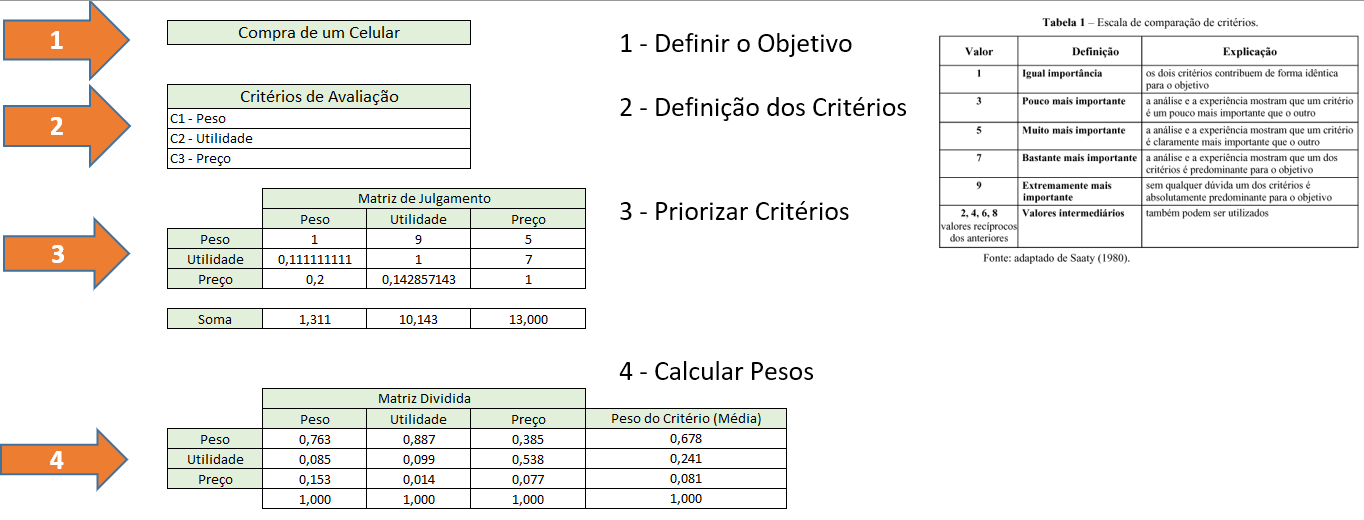

In [198]:
# CONSIDERANDO OS CALCULOS REALIZADOS NA PLANILHA (PASSOS 1 A 4)
# SEGUE A IMPLEMENTAÇÃO E EXECUÇÃO PARA OS PASOS 5 E 6

wcriterioPESO = 0.678
wcriterioUTIL = 0.241
wcriterioPRECO = 0.081


# CALCULA O RANGE DE ALTERNATIVAS DO PASSO 5 - (DE 1 A 9)
maxPESO, maxUTIL, maxPREC = 0,0,0
minPESO, minUTIL, minPREC = 999,999,999
for i in fit_pop_new:
    # if (maxPESO < i[2]): maxPESO = i[2]
    # if (minPESO > i[2]): minPESO = i[2]
    if (maxUTIL < i[3]): maxUTIL = i[3]
    if (minUTIL > i[3]): minUTIL = i[3]
    if (maxPREC < i[4]): maxPREC = i[4]
    if (minPREC > i[4]): minPREC = i[4]

# rPESO = round((maxPESO-minPESO)/10, 3)
rPESO = 1.2
rUTIL = round((maxUTIL-minUTIL)/10)
rPRECO= round((maxPREC-minPREC)/10,2)

rangePESO, rangeUTIL, rangePRECO = [],[],[]
for i in range(1,10):
    rangePESO.append(round(i*1.2,3))
    rangeUTIL.append(round(i*rUTIL))
    rangePRECO.append(round(i*rPRECO,2))
rangePRECO.sort(reverse=True)

In [199]:
print(rangePESO)
print(rangeUTIL)
print(rangePRECO)

[1.2, 2.4, 3.6, 4.8, 6.0, 7.2, 8.4, 9.6, 10.8]
[396, 792, 1188, 1584, 1980, 2376, 2772, 3168, 3564]
[1032.93, 918.16, 803.39, 688.62, 573.85, 459.08, 344.31, 229.54, 114.77]


In [206]:
# ATRIBUI DE 1 A 9 DE ACORDO COM O RANGE CALCULADO
paretoFRENTE_0 = []
for i in fit_pop_new:
  if (i[0] == 0):
      paretoFRENTE_0.append(i[2:6])

for i in paretoFRENTE_0:
    ps,ul,pr = 0,0,0
    for j in range(9):
        if (i[0] >= rangePESO[j]): ps+=1 
        if (i[1] >= rangeUTIL[j]): ul+=1
        if (i[2] <= rangePRECO[j]): pr+=1

    if (ps == 0): ps=1
    if (ul == 0): ul=1
    if (pr == 0): pr=1

    # i[0],i[1],i[2] = ps,ul,pr
    i.append(ps)
    i.append(ul)
    i.append(pr)

# PASSO 6
for i in paretoFRENTE_0:
    i[4] = round(i[4]*wcriterioPESO,3)
    i[5] = round(i[5]*wcriterioUTIL,3)
    i[6] = round(i[6]*wcriterioPRECO,3)

aux = 1
for i in paretoFRENTE_0:
    i.insert(0, round((i[4]+i[5]+i[6]),3))
    i.insert(1, aux)
    aux+=1

paretoFRENTE_0.sort(reverse=True)

In [208]:
for i in paretoFRENTE_0: print(i)

[8.676, 96, 11.564, 3673, 539.27, [2, 52, 99, 194, 244, 263, 345, 385, 452], 6.102, 2.169, 0.405]
[8.597, 22, 11.798, 3254, 298.32, [112, 117, 131, 325, 326, 382, 385, 452], 6.102, 1.928, 0.567]
[8.595, 55, 11.605, 3993, 654.33, [52, 111, 131, 149, 171, 229, 234, 286, 345, 394, 451], 6.102, 2.169, 0.324]
[8.437, 63, 11.499, 2799, 208.76, [52, 66, 76, 184, 244, 348, 385], 6.102, 1.687, 0.648]
[8.435, 60, 11.978, 3508, 494.36, [52, 83, 117, 161, 326, 384, 385, 454, 471], 6.102, 1.928, 0.405]
[8.433, 33, 11.795, 3764, 812.93, [74, 91, 96, 100, 173, 226, 279, 318, 325, 345], 6.102, 2.169, 0.162]
[8.356, 90, 11.964, 2839, 286.23, [2, 91, 159, 171, 385, 394, 445], 6.102, 1.687, 0.567]
[8.352, 70, 11.906, 3582, 1052.47, [27, 30, 76, 99, 171, 225, 245, 345, 357, 469, 471], 6.102, 2.169, 0.081]
[8.275, 49, 11.862, 2885, 451.72, [52, 190, 310, 326, 357, 451, 456], 6.102, 1.687, 0.486]
[8.275, 42, 11.854, 2914, 434.14, [66, 131, 171, 209, 284, 326, 345, 445], 6.102, 1.687, 0.486]
[8.275, 17, 11.9